In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load dataset
df = pd.read_csv("merged_final.csv")

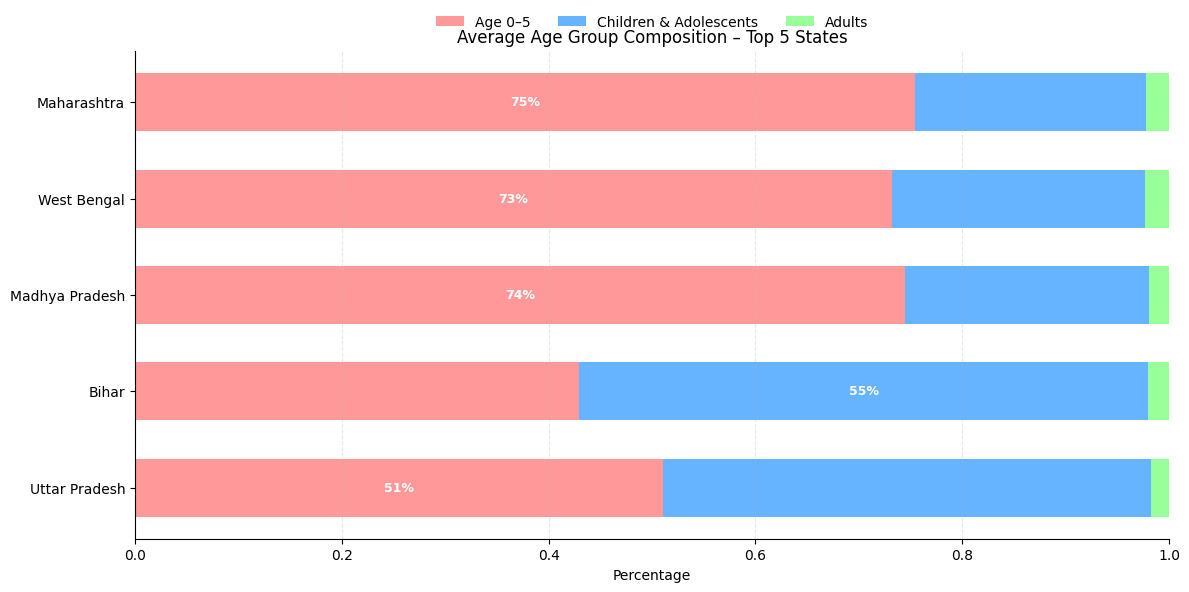

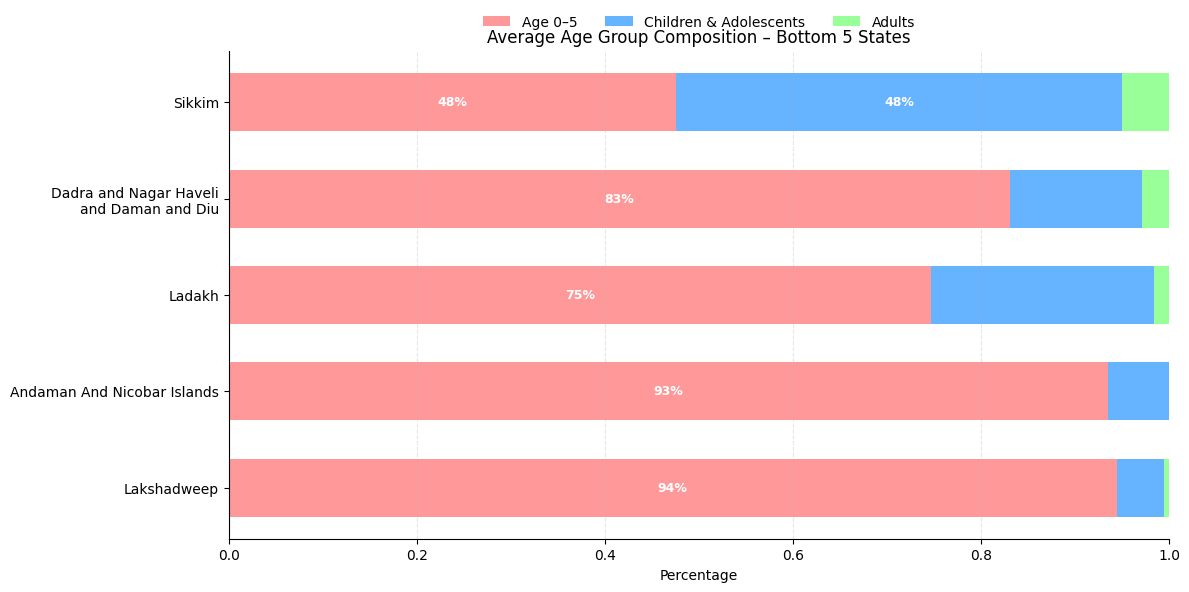

In [6]:
# -----------------------------
# AGE GROUP COMPOSITION BY STATE (STACKED HORIZONTAL BARS)
# -----------------------------

# Calculate total enrollment and percentages for each age group by state
state_totals = df.groupby('state')[['age_0_5', 'age_5_17', 'age_18_greater']].sum()
state_totals['total'] = state_totals.sum(axis=1)

# Calculate percentages
avg_pct = state_totals[['age_0_5', 'age_5_17', 'age_18_greater']].div(state_totals['total'], axis=0)
avg_pct['state'] = avg_pct.index

# Get top 5 and bottom 5 states by total enrollment
top_5_states = state_totals.nlargest(5, 'total').index.tolist()
bottom_5_states = state_totals.nsmallest(5, 'total').index.tolist()

# Define columns and colors
cols = ['age_0_5', 'age_5_17', 'age_18_greater']
colors = ['#ff9999', '#66b3ff', '#99ff99']

def wrap_state_label(name):
    if name.lower() == "dadra and nagar haveli and daman and diu":
        return "Dadra and Nagar Haveli\nand Daman and Diu"
    return name

def plot_clean_stacked_pct(df, states, title, figsize=(12, 6)):
    df_plot = df[df['state'].isin(states)].set_index('state')[cols]
    df_plot = df_plot.loc[states]

    # wrapped state labels
    state_labels = [wrap_state_label(s) for s in df_plot.index]

    fig, ax = plt.subplots(figsize=figsize)

    y = np.arange(len(state_labels))
    left = np.zeros(len(state_labels))

    age_labels = ['Age 0–5', 'Children & Adolescents', 'Adults']

    for i, col in enumerate(cols):
        values = df_plot[col].values

        ax.barh(
            y,
            values,
            left=left,
            color=colors[i],
            height=0.6,
            label=age_labels[i]
        )

        # annotate only dominant segment per state
        for j, v in enumerate(values):
            if v == df_plot.iloc[j].max():
                ax.text(
                    left[j] + v / 2,
                    y[j],
                    f"{v:.0%}",
                    ha='center',
                    va='center',
                    fontsize=9,
                    color='white',
                    weight='bold'
                )

        left += values

    ax.set_yticks(y)
    ax.set_yticklabels(state_labels)
    ax.set_xlim(0, 1)
    ax.set_xlabel('Percentage')
    ax.set_title(title)

    ax.legend(
        loc='upper center',
        bbox_to_anchor=(0.5, 1.1),
        ncol=3,
        frameon=False
    )

    ax.grid(axis='x', linestyle='--', alpha=0.3)
    ax.grid(axis='y', visible=False)

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    plt.tight_layout()
    plt.show()

plot_clean_stacked_pct(
    avg_pct,
    top_5_states,
    "Average Age Group Composition – Top 5 States"
)

plot_clean_stacked_pct(
    avg_pct,
    bottom_5_states,
    "Average Age Group Composition – Bottom 5 States"
)

In [7]:
# -----------------------------
# BASIC DATASET DESCRIPTION
# -----------------------------
print("\n--- DATASET OVERVIEW ---")
print(df.head())
print("\nColumns:", df.columns.tolist())

# Convert date first before printing date range
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

print("\nTime Period Covered:")
print(df['date'].min(), "to", df['date'].max())

print("\nNumber of States:", df['state'].nunique())
print("Number of Districts:", df['district'].nunique())
print("Total Records:", len(df))

print("\nMissing Value Analysis:")
print(df.isnull().sum())

# Extract month and day
df['month'] = df['date'].dt.to_period('M')
df['day'] = df['date'].dt.day_name()


--- DATASET OVERVIEW ---
         date                        state                  district  pincode  \
0  01-09-2025  Andaman And Nicobar Islands                  Andamans   744101   
1  01-09-2025  Andaman And Nicobar Islands                  Andamans   744107   
2  01-09-2025  Andaman And Nicobar Islands                   Nicobar   744304   
3  01-09-2025  Andaman And Nicobar Islands                   Nicobar   744301   
4  01-09-2025  Andaman And Nicobar Islands  North And Middle Andaman   744201   

   age_0_5  age_5_17  age_18_greater  
0        0         1               0  
1        1         0               0  
2        1         0               0  
3        9         2               0  
4        1         0               0  

Columns: ['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17', 'age_18_greater']

Time Period Covered:
2025-03-02 00:00:00 to 2025-12-31 00:00:00

Number of States: 36
Number of Districts: 791
Total Records: 973818

Missing Value Analysis:
da

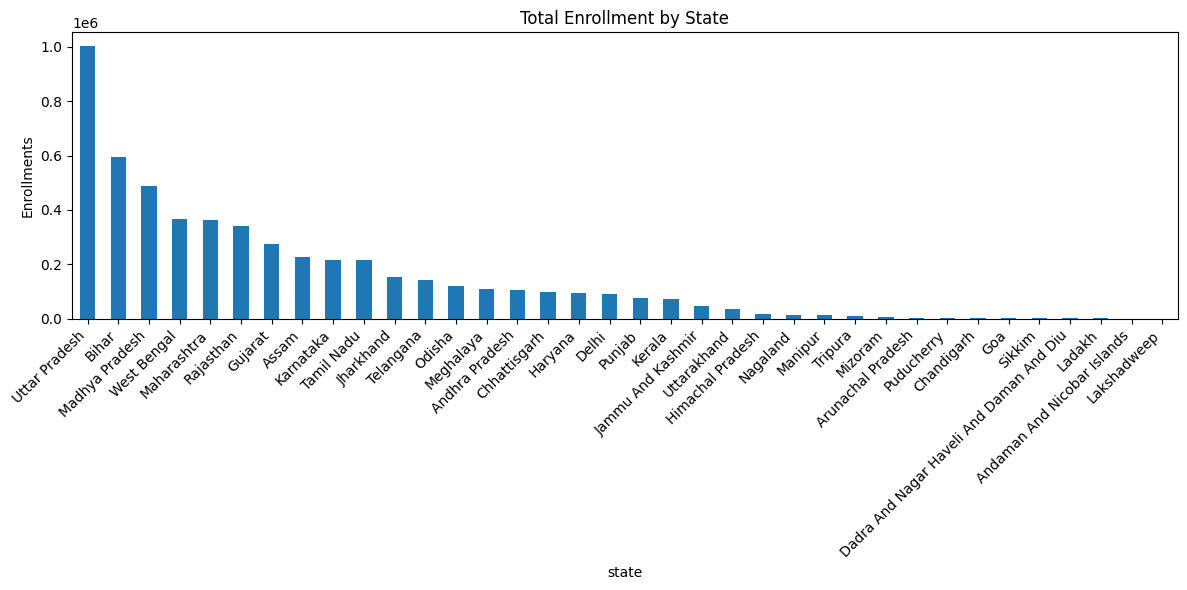

In [8]:
# -----------------------------
# TOTAL ENROLLMENT BAR GRAPH
# -----------------------------
# Calculate total enrollment from age columns
df['total_enrollment'] = df['age_0_5'] + df['age_5_17'] + df['age_18_greater']

state_enroll = df.groupby('state')['total_enrollment'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
state_enroll.plot(kind='bar')
plt.title("Total Enrollment by State")
plt.ylabel("Enrollments")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

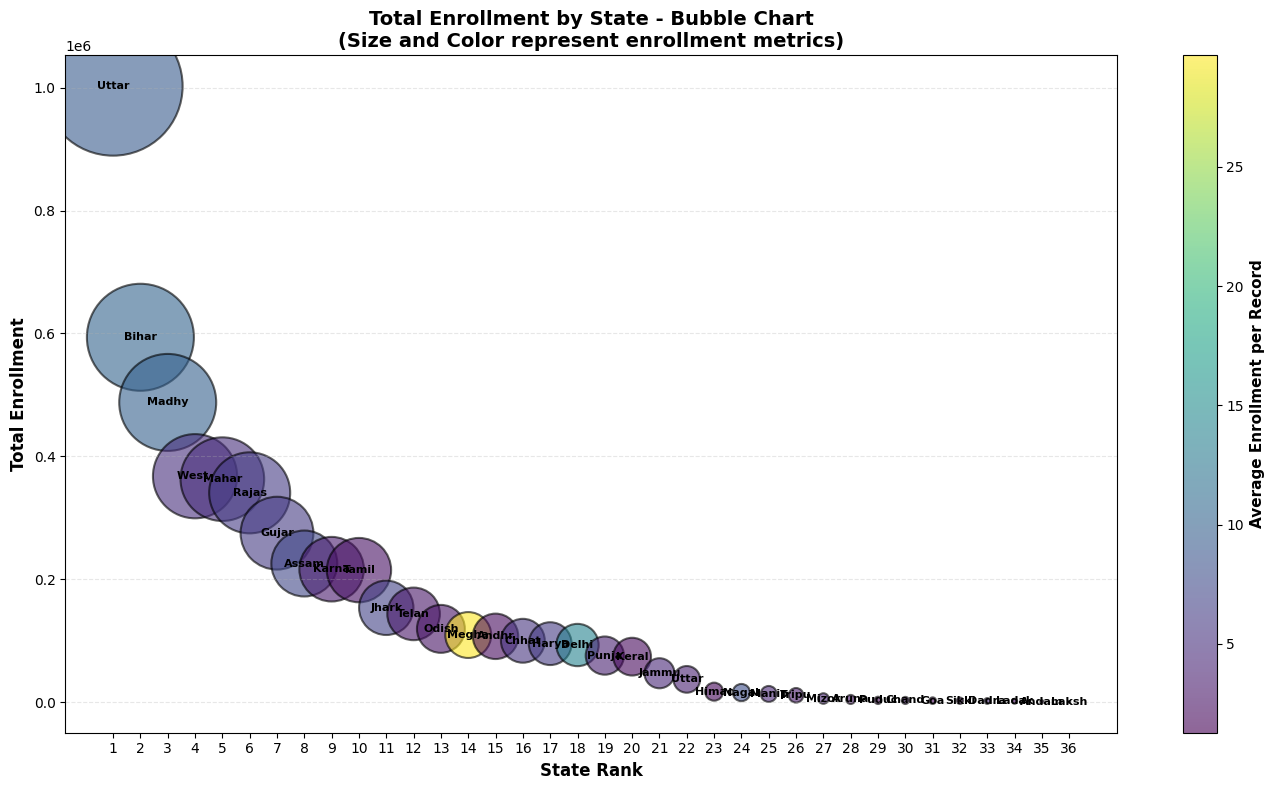

In [25]:
# -----------------------------
# TOTAL ENROLLMENT BUBBLE CHART BY STATE
# -----------------------------
state_stats = df.groupby('state').agg({
    'total_enrollment': ['sum', 'mean', 'count']
}).reset_index()
state_stats.columns = ['state', 'total_enrollment', 'avg_enrollment', 'record_count']

# Sort by total enrollment
state_stats = state_stats.sort_values('total_enrollment', ascending=False)

plt.figure(figsize=(14, 8))
scatter = plt.scatter(
    range(len(state_stats)), 
    state_stats['total_enrollment'],
    s=state_stats['total_enrollment']/100,  # Bubble size proportional to total enrollment
    c=state_stats['avg_enrollment'],  # Color by average enrollment
    cmap='viridis',
    alpha=0.6,
    edgecolors='black',
    linewidth=1.5
)

plt.xlabel('State Rank', fontsize=12, fontweight='bold')
plt.ylabel('Total Enrollment', fontsize=12, fontweight='bold')
plt.title('Total Enrollment by State - Bubble Chart\n(Size and Color represent enrollment metrics)', 
          fontsize=14, fontweight='bold')
plt.xticks(range(len(state_stats)), range(1, len(state_stats)+1))

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Average Enrollment per Record', fontsize=11, fontweight='bold')

# Add state labels to bubbles
for idx, row in state_stats.iterrows():
    plt.annotate(
        row['state'][:5],  # Show first 5 characters of state name
        (list(range(len(state_stats)))[list(state_stats.index).index(idx)], row['total_enrollment']),
        ha='center',
        va='center',
        fontsize=8,
        fontweight='bold'
    )

plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


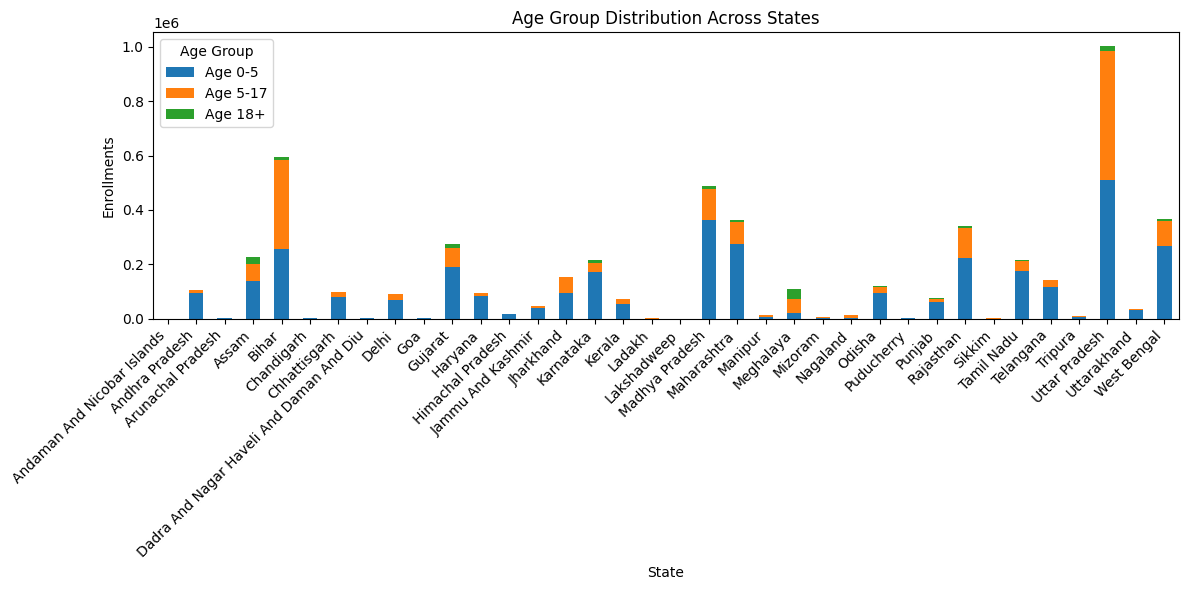

In [9]:
# -----------------------------
# AGE GROUP DISTRIBUTION
# -----------------------------
# Sum age groups by state
age_dist = df.groupby('state')[['age_0_5', 'age_5_17', 'age_18_greater']].sum()
age_dist.columns = ['Age 0-5', 'Age 5-17', 'Age 18+']

age_dist.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Age Group Distribution Across States")
plt.ylabel("Enrollments")
plt.xlabel("State")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

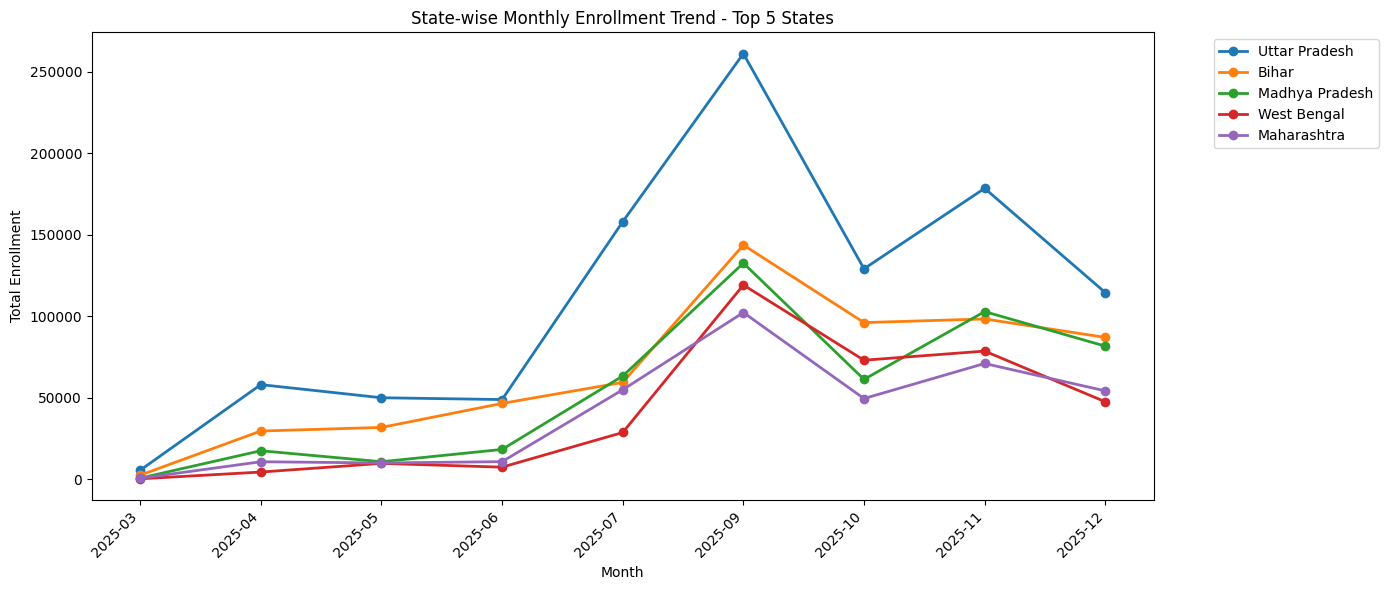

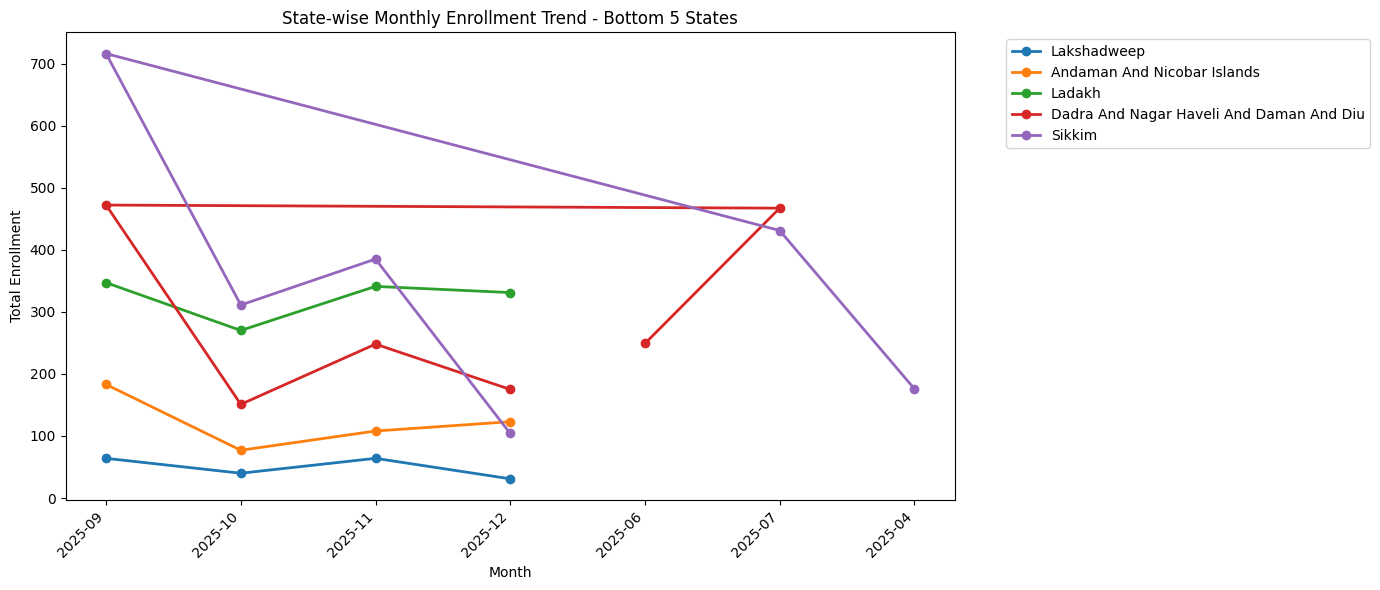

In [10]:
# -----------------------------
# STATE-MONTH GROWTH TREND
# -----------------------------

monthly_state = df.groupby(['state','month'])['total_enrollment'].sum().reset_index()

# Get top 5 and bottom 5 states by total enrollment
state_totals_trend = df.groupby('state')['total_enrollment'].sum()
top_5_trend = state_totals_trend.nlargest(5).index.tolist()
bottom_5_trend = state_totals_trend.nsmallest(5).index.tolist()

# Plot Top 5 States
plt.figure(figsize=(14, 6))
for state in top_5_trend:
    temp = monthly_state[monthly_state['state']==state]
    plt.plot(temp['month'].astype(str), temp['total_enrollment'], label=state, marker='o', linewidth=2)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("State-wise Monthly Enrollment Trend - Top 5 States")
plt.xlabel("Month")
plt.ylabel("Total Enrollment")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot Bottom 5 States
plt.figure(figsize=(14, 6))
for state in bottom_5_trend:
    temp = monthly_state[monthly_state['state']==state]
    plt.plot(temp['month'].astype(str), temp['total_enrollment'], label=state, marker='o', linewidth=2)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("State-wise Monthly Enrollment Trend - Bottom 5 States")
plt.xlabel("Month")
plt.ylabel("Total Enrollment")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

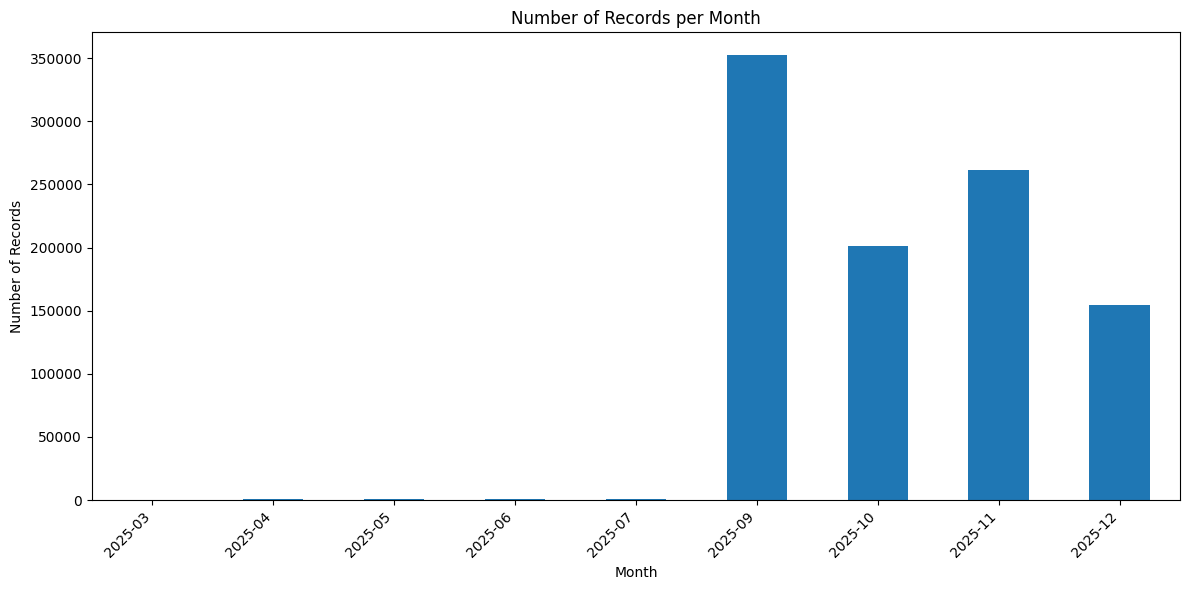

In [11]:
# -----------------------------
# HISTOGRAM MONTH WISE
# -----------------------------

plt.figure(figsize=(12, 6))
df['month_str'] = df['month'].astype(str)
df['month_str'].value_counts().sort_index().plot(kind='bar')
plt.title("Number of Records per Month")
plt.xlabel("Month")
plt.ylabel("Number of Records")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()  

In [12]:
# -----------------------------
# HIGHEST ENROLLMENT DATE
# -----------------------------

daily_enroll = df.groupby('date')['total_enrollment'].sum()
max_date = daily_enroll.idxmax()
print(f"\nDate with Highest Enrollment: {max_date.date()} with {daily_enroll[max_date]} enrollments")



Date with Highest Enrollment: 2025-07-01 with 616868 enrollments


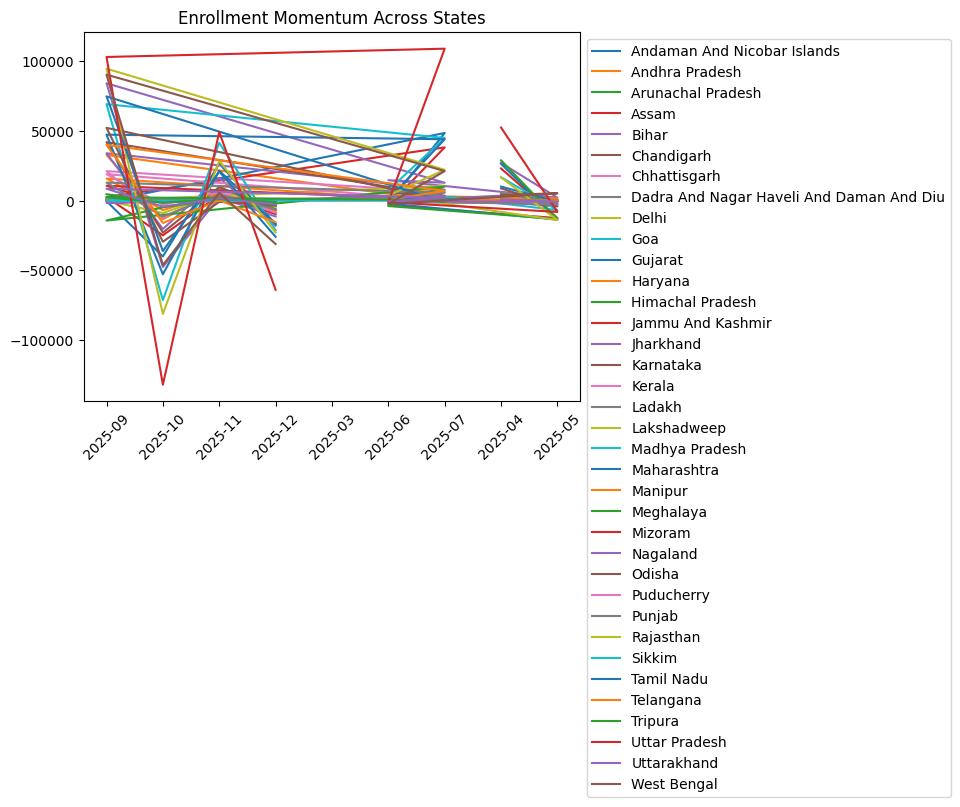

In [13]:
# -----------------------------
# ENROLLMENT MOMENTUM (MONTHLY CHANGE)
# -----------------------------
momentum = monthly_state.copy()
momentum['prev'] = momentum.groupby('state')['total_enrollment'].shift(1)
momentum['momentum'] = momentum['total_enrollment'] - momentum['prev']

plt.figure()
for state in momentum['state'].unique():
    temp = momentum[momentum['state']==state]
    plt.plot(temp['month'].astype(str), temp['momentum'], label=state)
plt.title("Enrollment Momentum Across States")
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(rotation=45)
plt.show()

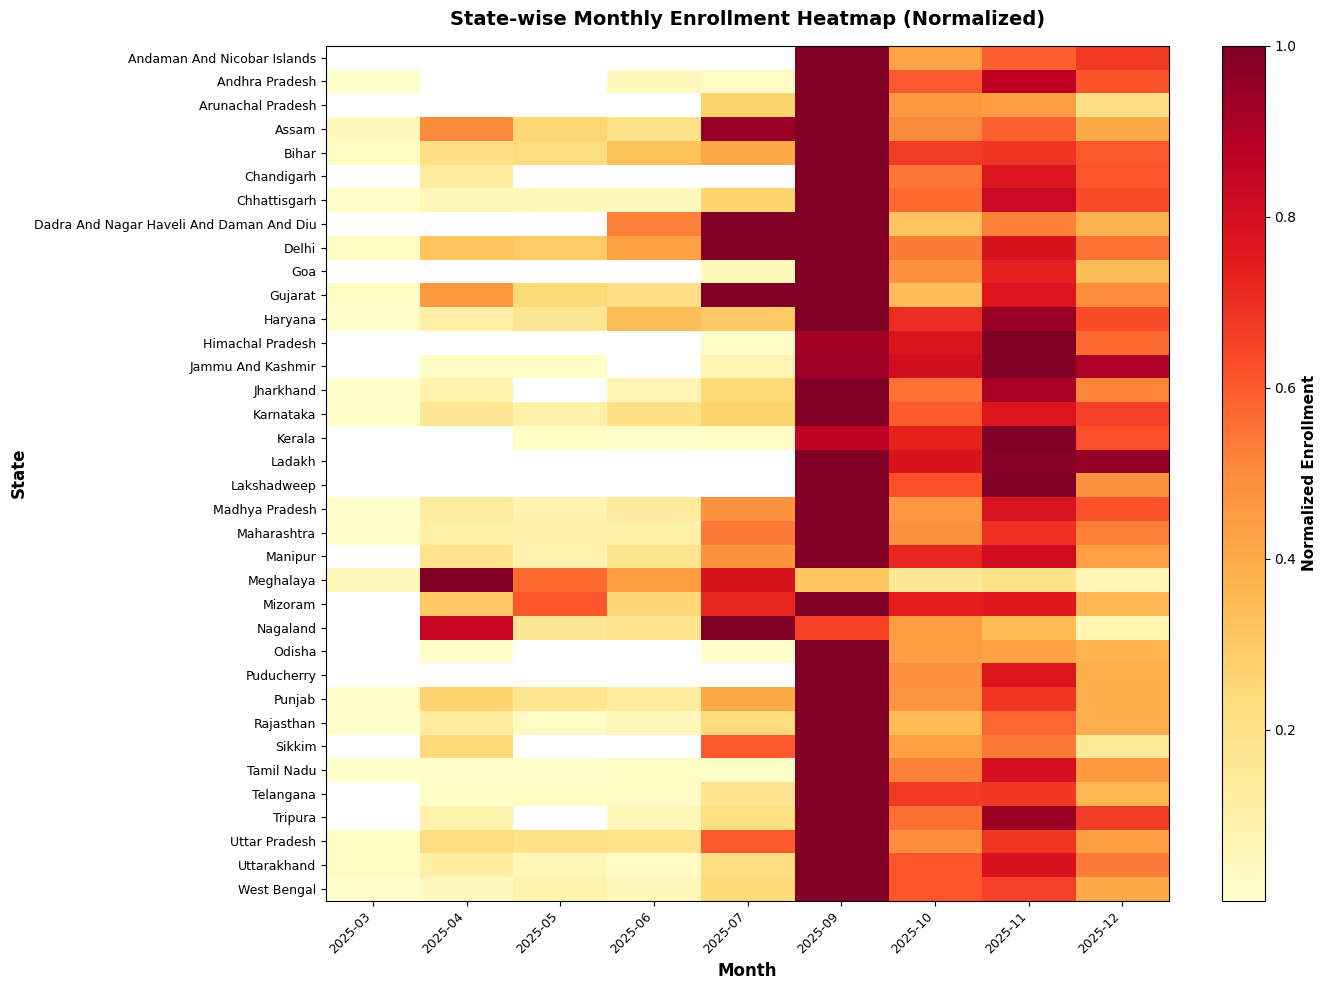

In [14]:
# -----------------------------
# ENROLLMENT HEATMAP (STATE X MONTH)
# -----------------------------

# Create a pivot table for heatmap (State x Month)
heatmap_data = df.pivot_table(
    values='total_enrollment', 
    index='state', 
    columns='month', 
    aggfunc='sum'
)

# Normalize data for better visualization
heatmap_normalized = heatmap_data.div(heatmap_data.max(axis=1), axis=0)

# Create heatmap
fig, ax = plt.subplots(figsize=(14, 10))
im = ax.imshow(heatmap_normalized, cmap='YlOrRd', aspect='auto', interpolation='nearest')

# Set ticks and labels
ax.set_xticks(range(len(heatmap_normalized.columns)))
ax.set_yticks(range(len(heatmap_normalized.index)))
ax.set_xticklabels([str(col) for col in heatmap_normalized.columns], rotation=45, ha='right', fontsize=9)
ax.set_yticklabels(heatmap_normalized.index, fontsize=9)

# Add colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Normalized Enrollment', fontsize=11, fontweight='bold')

# Labels and title
ax.set_xlabel('Month', fontsize=12, fontweight='bold')
ax.set_ylabel('State', fontsize=12, fontweight='bold')
ax.set_title('State-wise Monthly Enrollment Heatmap (Normalized)', fontsize=14, fontweight='bold', pad=15)

plt.tight_layout()
plt.show()

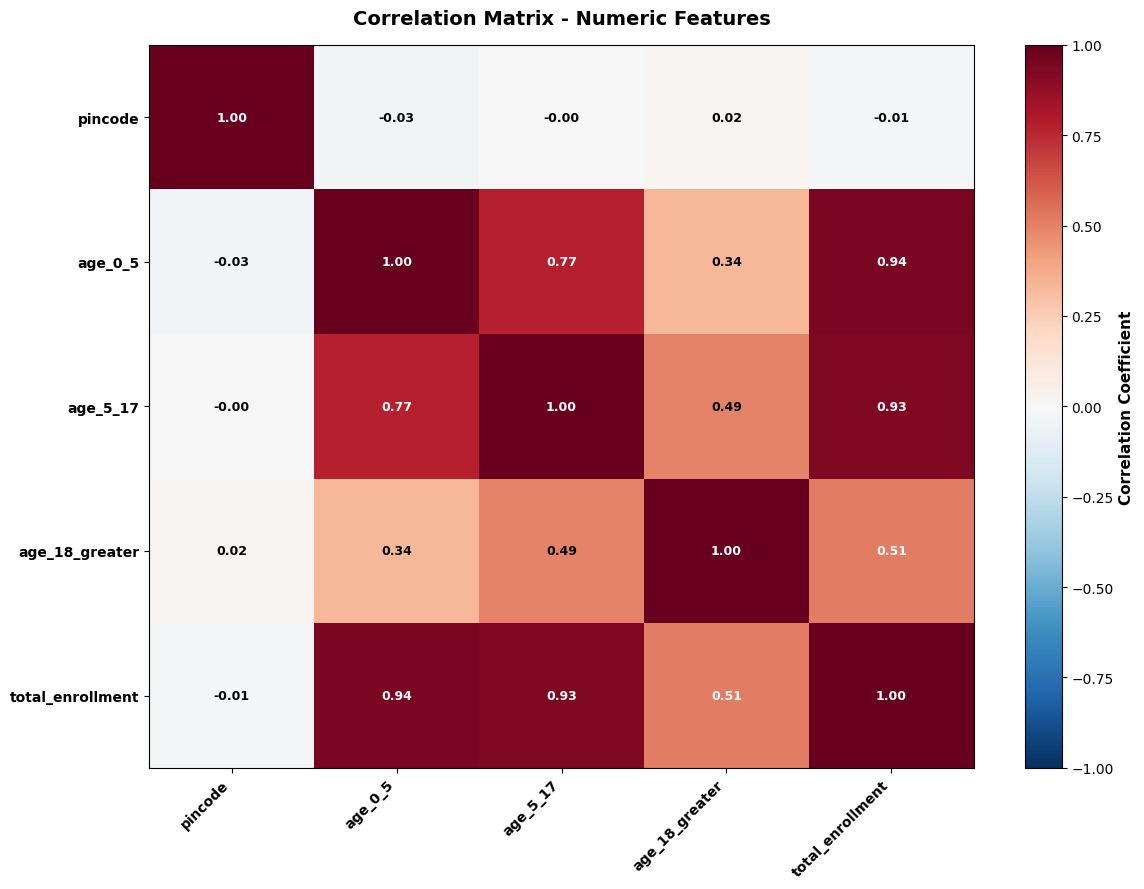

In [16]:
# -----------------------------
# HEATMAP (CORRELATION)
# -----------------------------
numeric_cols = df.select_dtypes(include=['number']).columns
corr = df[numeric_cols].corr()

fig, ax = plt.subplots(figsize=(12, 9))
im = ax.imshow(corr, cmap='RdBu_r', aspect='auto', vmin=-1, vmax=1)

# Set ticks and labels
ax.set_xticks(range(len(numeric_cols)))
ax.set_yticks(range(len(numeric_cols)))
ax.set_xticklabels(numeric_cols, rotation=45, ha='right', fontsize=10, fontweight='bold')
ax.set_yticklabels(numeric_cols, fontsize=10, fontweight='bold')

# Add correlation values as annotations
for i in range(len(numeric_cols)):
    for j in range(len(numeric_cols)):
        value = corr.iloc[i, j]
        color = 'white' if abs(value) > 0.5 else 'black'
        text = ax.text(j, i, f'{value:.2f}', ha='center', va='center', 
                      color=color, fontsize=9, fontweight='bold')

# Add colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Correlation Coefficient', fontsize=11, fontweight='bold')

ax.set_title('Correlation Matrix - Numeric Features', fontsize=14, fontweight='bold', pad=15)
ax.grid(False)

plt.tight_layout()
plt.show()

C:\Users\AKHILESH\AppData\Local\Temp\ipykernel_11772\2522255379.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top5, x='state', y='total_enrollment', palette='Blues', ax=ax)


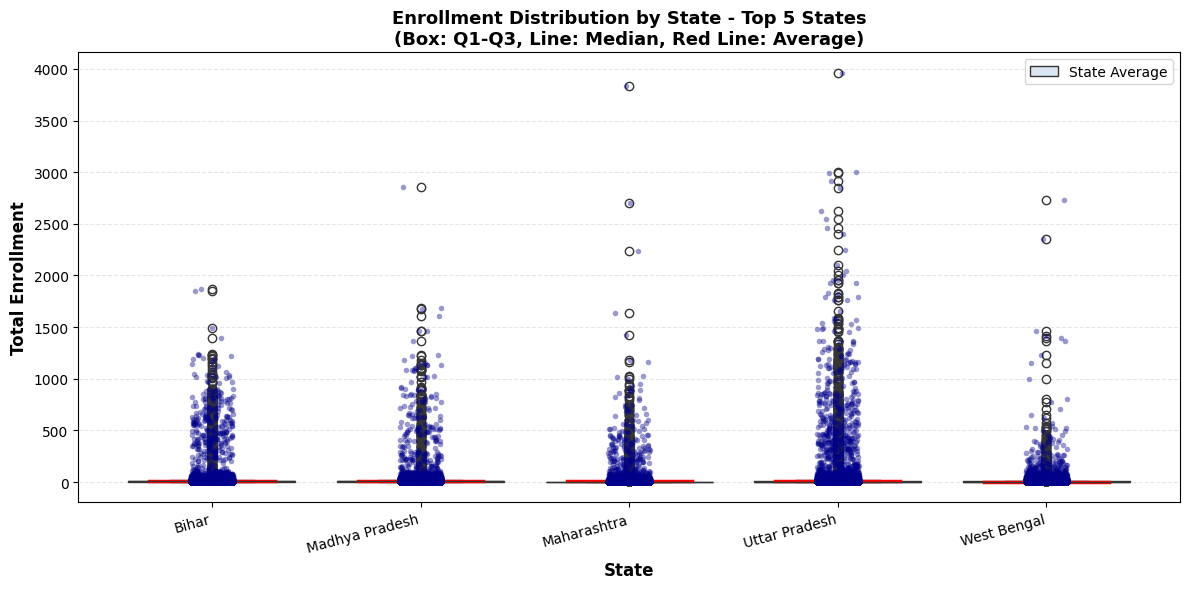

C:\Users\AKHILESH\AppData\Local\Temp\ipykernel_11772\2522255379.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_bottom5, x='state', y='total_enrollment', palette='Oranges', ax=ax)


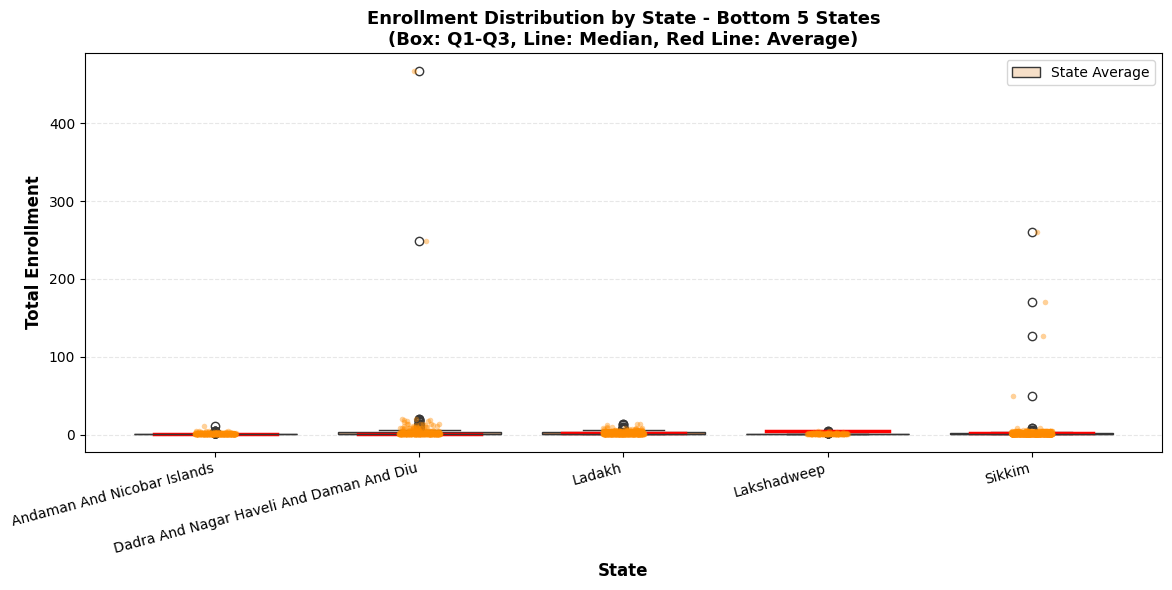

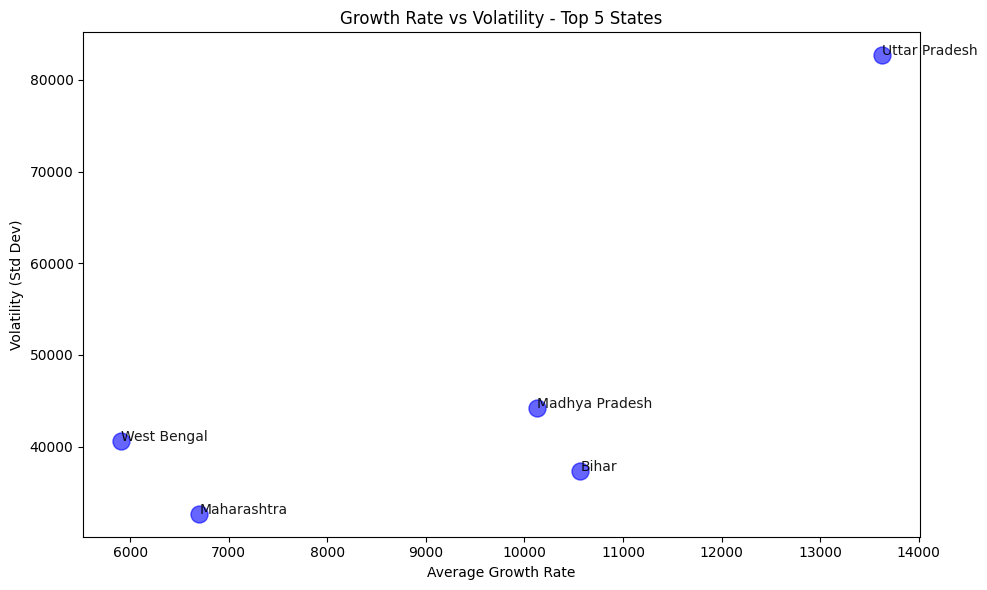

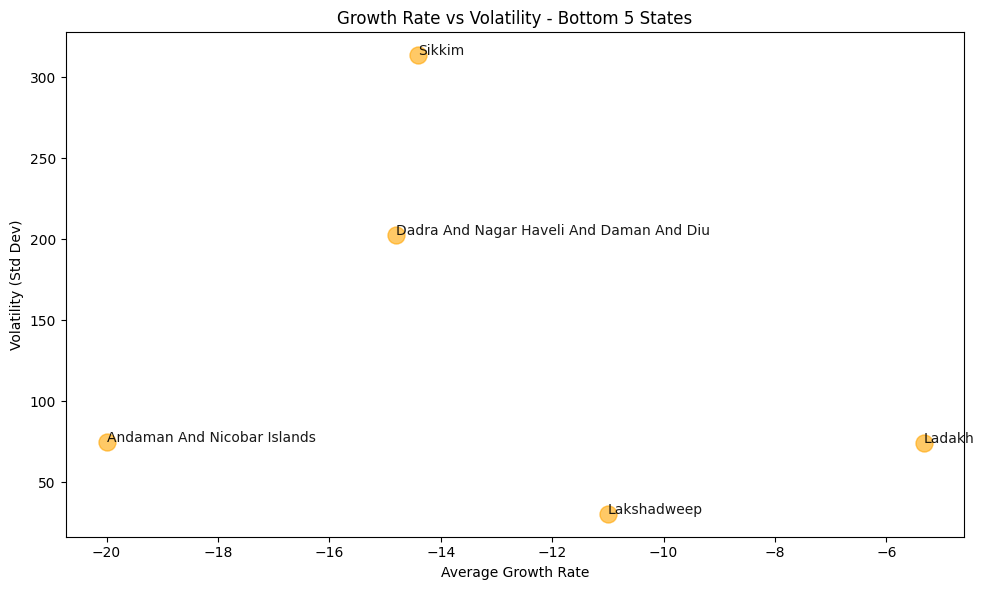

In [27]:
# -----------------------------
# SCATTER PLOTS (KEY)
# -----------------------------
from matplotlib.patches import Patch
import seaborn as sns

state_avg = df.groupby('state')['total_enrollment'].mean()
district_sum = df.groupby('district')['total_enrollment'].sum()

# Get top 5 and bottom 5 states
state_totals_scatter = df.groupby('state')['total_enrollment'].sum()
top_5_scatter = state_totals_scatter.nlargest(5).index.tolist()
bottom_5_scatter = state_totals_scatter.nsmallest(5).index.tolist()

# TOP 5 STATES - Distribution by State (Boxplot + Stripplot)
df_top5 = df[df['state'].isin(top_5_scatter)].copy()

fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df_top5, x='state', y='total_enrollment', palette='Blues', ax=ax)
sns.stripplot(data=df_top5, x='state', y='total_enrollment', 
              color='darkblue', alpha=0.4, size=4, ax=ax)

# Add state average line
for i, state in enumerate(top_5_scatter):
    avg_val = state_avg[state]
    ax.plot([i-0.3, i+0.3], [avg_val, avg_val], 'r-', linewidth=2.5, label='State Avg' if i==0 else '')

ax.set_xlabel('State', fontsize=12, fontweight='bold')
ax.set_ylabel('Total Enrollment', fontsize=12, fontweight='bold')
ax.set_title('Enrollment Distribution by State - Top 5 States\n(Box: Q1-Q3, Line: Median, Red Line: Average)', 
             fontsize=13, fontweight='bold')
ax.legend(['State Average'], fontsize=10)
ax.grid(axis='y', alpha=0.3, linestyle='--')
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()

# BOTTOM 5 STATES - Distribution by State (Boxplot + Stripplot)
df_bottom5 = df[df['state'].isin(bottom_5_scatter)].copy()

fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df_bottom5, x='state', y='total_enrollment', palette='Oranges', ax=ax)
sns.stripplot(data=df_bottom5, x='state', y='total_enrollment', 
              color='darkorange', alpha=0.4, size=4, ax=ax)

# Add state average line
for i, state in enumerate(bottom_5_scatter):
    avg_val = state_avg[state]
    ax.plot([i-0.3, i+0.3], [avg_val, avg_val], 'r-', linewidth=2.5, label='State Avg' if i==0 else '')

ax.set_xlabel('State', fontsize=12, fontweight='bold')
ax.set_ylabel('Total Enrollment', fontsize=12, fontweight='bold')
ax.set_title('Enrollment Distribution by State - Bottom 5 States\n(Box: Q1-Q3, Line: Median, Red Line: Average)', 
             fontsize=13, fontweight='bold')
ax.legend(['State Average'], fontsize=10)
ax.grid(axis='y', alpha=0.3, linestyle='--')
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()

# TOP 5 STATES - Growth vs volatility
growth = momentum.groupby('state')['momentum'].mean()
volatility = momentum.groupby('state')['momentum'].std()

growth_top5 = growth[growth.index.isin(top_5_scatter)]
volatility_top5 = volatility[volatility.index.isin(top_5_scatter)]

plt.figure(figsize=(10, 6))
for state in growth_top5.index:
    plt.scatter(growth_top5[state], volatility_top5[state], s=150, alpha=0.6, color='blue')
    plt.annotate(state, (growth_top5[state], volatility_top5[state]), fontsize=10, alpha=0.9)
plt.xlabel("Average Growth Rate")
plt.ylabel("Volatility (Std Dev)")
plt.title("Growth Rate vs Volatility - Top 5 States")
plt.tight_layout()
plt.show()

# BOTTOM 5 STATES - Growth vs volatility
growth_bottom5 = growth[growth.index.isin(bottom_5_scatter)]
volatility_bottom5 = volatility[volatility.index.isin(bottom_5_scatter)]

plt.figure(figsize=(10, 6))
for state in growth_bottom5.index:
    plt.scatter(growth_bottom5[state], volatility_bottom5[state], s=150, alpha=0.6, color='orange')
    plt.annotate(state, (growth_bottom5[state], volatility_bottom5[state]), fontsize=10, alpha=0.9)
plt.xlabel("Average Growth Rate")
plt.ylabel("Volatility (Std Dev)")
plt.title("Growth Rate vs Volatility - Bottom 5 States")
plt.tight_layout()
plt.show()

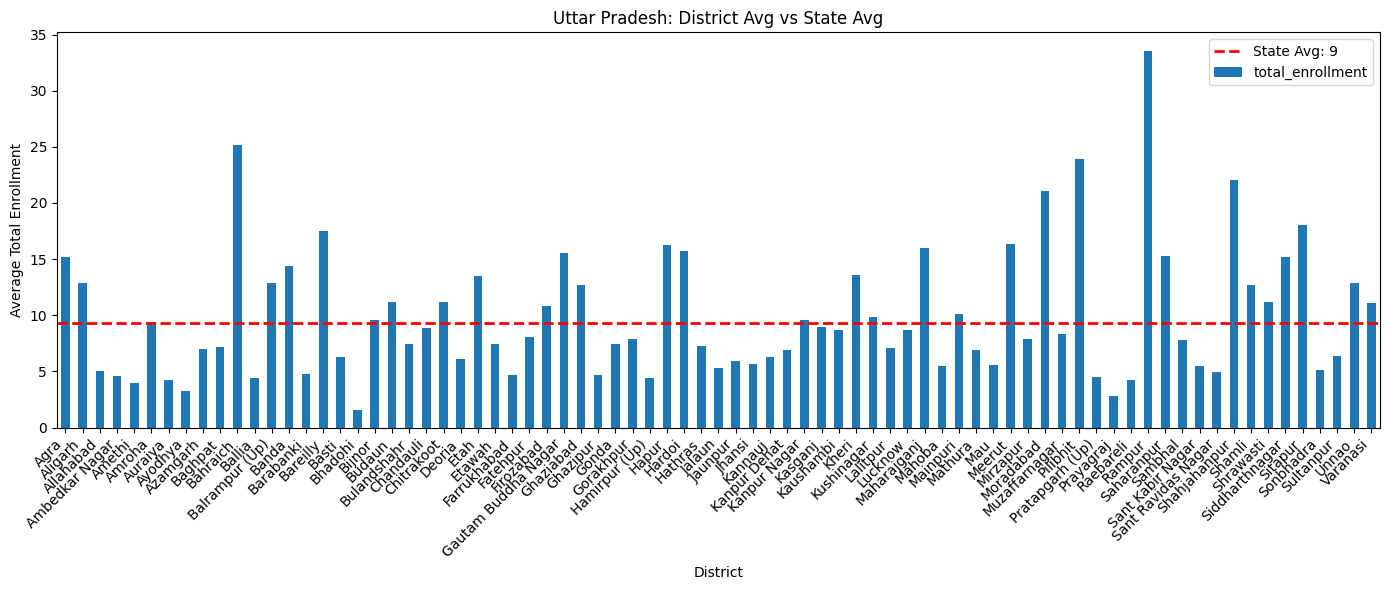

In [18]:
# -----------------------------
# DISTRICT VS STATE AVG (UP)
# -----------------------------
up = df[df['state']=="Uttar Pradesh"]
up_dist = up.groupby('district')['total_enrollment'].mean()
up_state_avg = up['total_enrollment'].mean()

plt.figure(figsize=(14, 6))
up_dist.plot(kind='bar')
plt.axhline(up_state_avg, color='red', linestyle='--', linewidth=2, label=f'State Avg: {up_state_avg:.0f}')
plt.title("Uttar Pradesh: District Avg vs State Avg")
plt.xlabel("District")
plt.ylabel("Average Total Enrollment")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [19]:
# -----------------------------
# ANOMALY DETECTION (Z-SCORE)
# -----------------------------
df['z'] = (df['total_enrollment'] - df['total_enrollment'].mean()) / df['total_enrollment'].std()
anomalies = df[df['z'].abs() > 3]
print("\nDetected Anomalies (Z-Score > 3):")
print(f"Number of anomalies: {len(anomalies)}")
if len(anomalies) > 0:
    print(anomalies[['date','state','district','total_enrollment','z']].sort_values('z', ascending=False))


Detected Anomalies (Z-Score > 3):
Number of anomalies: 2940
             date          state          district  total_enrollment  \
782317 2025-07-01  Uttar Pradesh         Moradabad              3965   
431059 2025-07-01    Maharashtra        Aurangabad              3835   
509187 2025-04-01      Meghalaya  West Khasi Hills              3027   
782269 2025-07-01  Uttar Pradesh            Hardoi              3006   
782244 2025-07-01  Uttar Pradesh         Firozabad              2990   
...           ...            ...               ...               ...   
797231 2025-09-10  Uttar Pradesh         Moradabad               102   
55340  2025-04-01          Assam         Sivasagar               102   
55556  2025-07-01          Assam           Chirang               102   
55637  2025-07-01          Assam            Kamrup               102   
624572 2025-11-15      Rajasthan           Jodhpur               102   

                 z  
782317  123.423569  
431059  119.371312  
509187   94

In [20]:
# -----------------------------
# INEQUALITY ANALYSIS
# -----------------------------
cv = df.groupby('state')['total_enrollment'].std() / df.groupby('state')['total_enrollment'].mean()
print("\nCoefficient of Variation by State (Higher = More Inequality):")
print(cv.sort_values(ascending=False))

top10_pct = int(0.1 * len(district_sum))
top10 = district_sum.sort_values(ascending=False).head(top10_pct)
contribution = top10.sum() / district_sum.sum() * 100
print(f"\nTop 10% districts ({top10_pct} districts) contribute {contribution:.2f}% of total enrollment")
print(f"Total districts: {len(district_sum)}")


Coefficient of Variation by State (Higher = More Inequality):
state
Manipur                                     7.910943
Punjab                                      6.678766
Maharashtra                                 6.336166
Uttar Pradesh                               6.036870
Dadra And Nagar Haveli And Daman And Diu    5.917287
Haryana                                     5.884542
Uttarakhand                                 5.818130
Gujarat                                     5.715907
Delhi                                       5.549396
Nagaland                                    5.308983
Sikkim                                      4.911252
Mizoram                                     4.621595
West Bengal                                 4.614724
Rajasthan                                   4.599760
Assam                                       4.580874
Meghalaya                                   4.553771
Karnataka                                   4.480978
Bihar                         

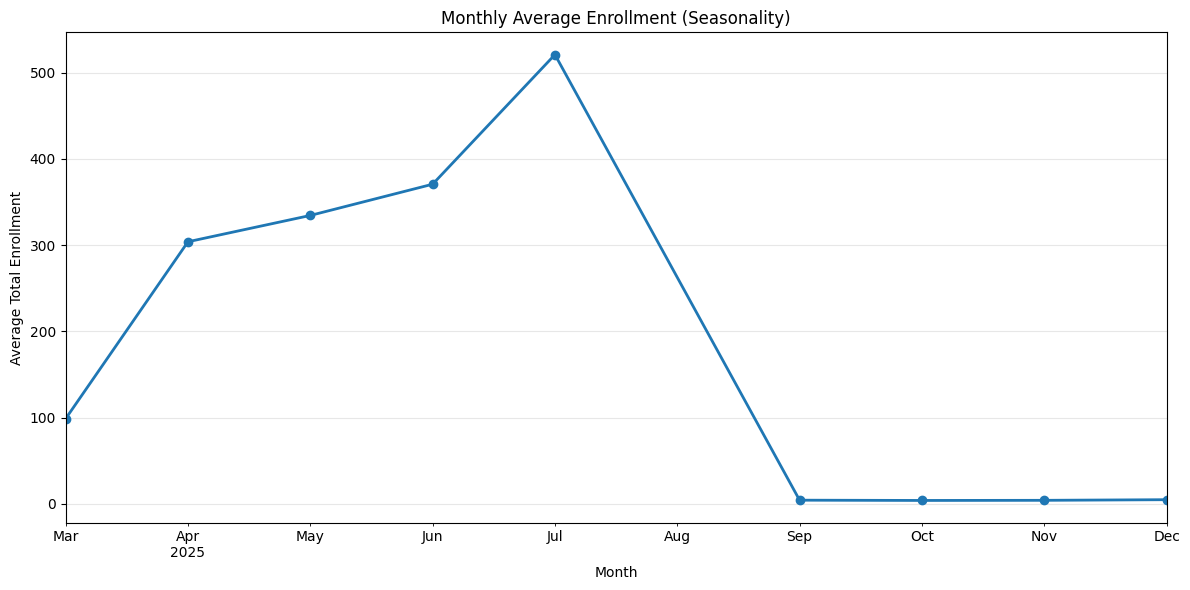

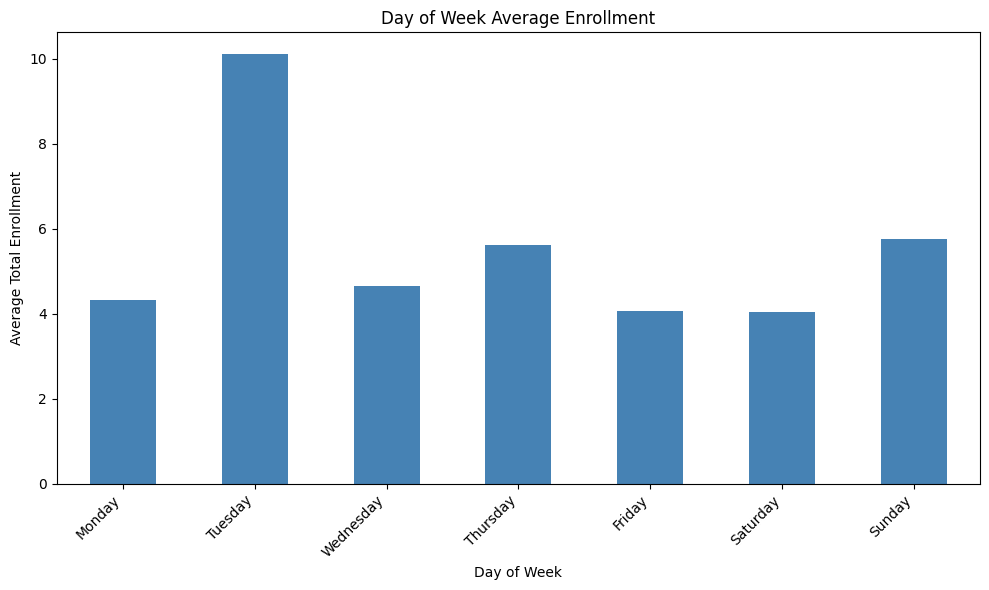

In [21]:
# -----------------------------
# SEASONALITY
# -----------------------------
monthly_avg = df.groupby('month')['total_enrollment'].mean()
plt.figure(figsize=(12, 6))
monthly_avg.plot(marker='o', linewidth=2)
plt.title("Monthly Average Enrollment (Seasonality)")
plt.xlabel("Month")
plt.ylabel("Average Total Enrollment")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

dow_avg = df.groupby('day')['total_enrollment'].mean()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_avg = dow_avg.reindex([d for d in day_order if d in dow_avg.index])

plt.figure(figsize=(10, 6))
dow_avg.plot(kind='bar', color='steelblue')
plt.title("Day of Week Average Enrollment")
plt.xlabel("Day of Week")
plt.ylabel("Average Total Enrollment")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [22]:
# -----------------------------
# BEFORE-AFTER ANALYSIS
# -----------------------------
# Find the date with highest total enrollment
daily_total = df.groupby('date')['total_enrollment'].sum()
peak_date = daily_total.idxmax()
peak_enrollment = daily_total[peak_date]

# Get before and after by state since dates may have few records
state_peak = df.groupby('state')['total_enrollment'].sum().idxmax()
peak_state_data = df[df['state'] == state_peak].groupby('date')['total_enrollment'].sum()
peak_state_date = peak_state_data.idxmax()

print("\n--- Peak Date Impact Analysis ---")
print(f"Overall Peak Date: {peak_date.date()}")
print(f"Overall Peak Total Enrollment: {peak_enrollment:.0f}")
print(f"\nState with Highest Enrollment: {state_peak}")
print(f"State Peak Date: {peak_state_date.date()}")

# Compare monthly averages before and after overall peak
peak_month = peak_date.to_period('M')
months = df['month'].unique()
months_sorted = sorted(months)
peak_idx = list(months_sorted).index(peak_month)

if peak_idx > 0:
    before_month = months_sorted[peak_idx - 1]
    before_avg = df[df['month'] == before_month]['total_enrollment'].mean()
    print(f"\nAverage enrollment before peak month ({before_month}): {before_avg:.2f}")
    
if peak_idx < len(months_sorted) - 1:
    after_month = months_sorted[peak_idx + 1]
    after_avg = df[df['month'] == after_month]['total_enrollment'].mean()
    print(f"Average enrollment after peak month ({after_month}): {after_avg:.2f}")


--- Peak Date Impact Analysis ---
Overall Peak Date: 2025-07-01
Overall Peak Total Enrollment: 616868

State with Highest Enrollment: Uttar Pradesh
State Peak Date: 2025-07-01

Average enrollment before peak month (2025-06): 370.68
Average enrollment after peak month (2025-09): 4.17


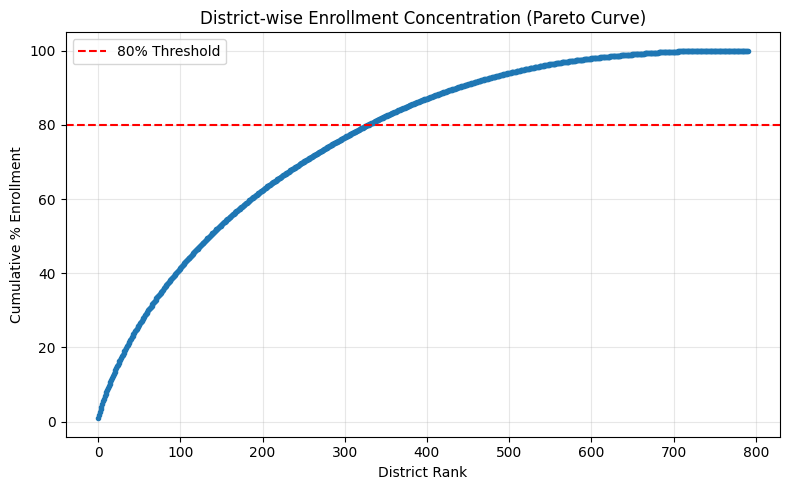

In [24]:
# -----------------------------
# District Contribution Pareto Chart
# -----------------------------

district_total = df.groupby('district')['total_enrollment'].sum().sort_values(ascending=False)

cum = district_total.cumsum() / district_total.sum() * 100

plt.figure(figsize=(8, 5))
plt.plot(cum.values, linewidth=2, marker='o', markersize=3)
plt.axhline(80, linestyle='--', color='red', label='80% Threshold')
plt.title("District-wise Enrollment Concentration (Pareto Curve)")
plt.ylabel("Cumulative % Enrollment")
plt.xlabel("District Rank")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()